### Algorithmic Trading Strategy

Trend-following trading strategy using 10 and 25 moving averages

Import necessary libraries

In [1]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Viewing the dataset

In [3]:
data = pd.read_csv('aapl.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.0
mean,152.212146,154.314557,150.133376,152.296180,8.708514e+07,0.003625,0.0
std,13.032731,12.930480,13.060967,13.071323,2.394169e+07,0.028552,0.0
min,126.010002,127.769997,124.169998,125.019997,3.519590e+07,0.000000,0.0
25%,142.284995,144.390332,140.193857,142.229057,7.070485e+07,0.000000,0.0
50%,150.767914,153.425887,149.112647,151.070007,8.229120e+07,0.000000,0.0
75%,163.107113,165.498434,161.006612,163.295258,9.603815e+07,0.000000,0.0
max,177.745892,178.801116,175.904218,178.154053,1.826020e+08,0.230000,0.0


In [6]:
data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
data['Stock Splits'].sum()

0.0

In [8]:
#creating a copy of the dataset before preprocessing the dataset
data_new = data.copy()

#### Data Wrangling

In [9]:
#dropping the stock splits column because it does not contain any information.
data_new.drop('Stock Splits', axis = 1)

,Date,Open,High,Low,Close,Volume,Dividends
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0
...,...,...,...,...,...,...,...
246,2023-01-13 00:00:00-05:00,132.029999,134.919998,131.660004,134.759995,57758000,0.0
247,2023-01-17 00:00:00-05:00,134.830002,137.289993,134.130005,135.940002,63646600,0.0
248,2023-01-18 00:00:00-05:00,136.820007,138.610001,135.029999,135.210007,69672800,0.0
249,2023-01-19 00:00:00-05:00,134.080002,136.250000,133.770004,135.270004,58280400,0.0


In [10]:
data_new['Adj Close Price'] =  data_new['Close'] - data_new['Dividends']

In [11]:
data_new.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close Price
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0,161.472855
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0,160.687408
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0,158.858017
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0,158.768539
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0,158.301254


In [12]:
data_new['Date'] = pd.to_datetime(data_new['Date'])

Visualizing the data

<AxesSubplot: xlabel='Date', ylabel='Adj Close Price'>

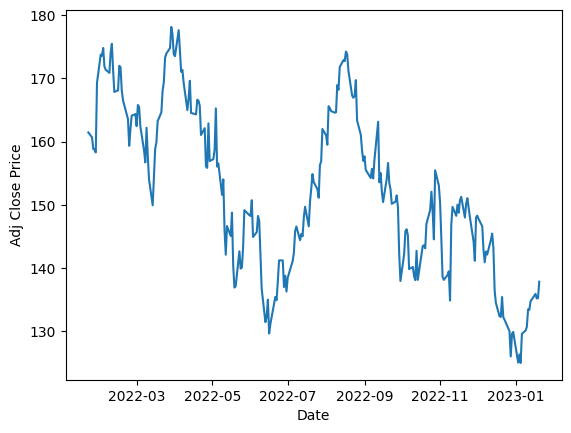

In [13]:
sns.lineplot(data = data_new, x = 'Date', y = 'Adj Close Price')

Creating a 10 day moving average

In [14]:
sma_10 = pd.DataFrame()
sma_10['Close'] = data_new["Adj Close Price"].rolling(window=10).mean()


Creating a 25 day moving average

In [15]:
sma_25 = pd.DataFrame()
sma_25['Close'] = data_new["Adj Close Price"].rolling(window=25).mean()

Visualizing the Adj Close Price line plot with the moving averages

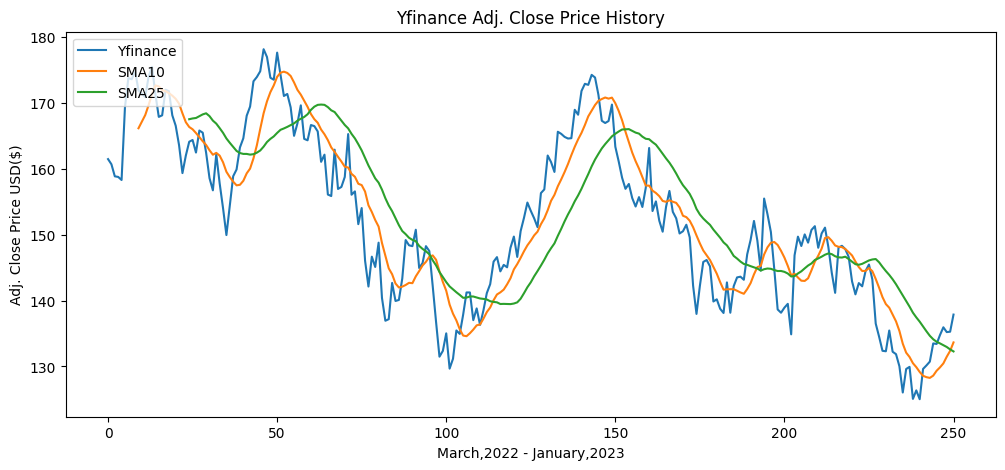

In [16]:
plt.figure(figsize=(12,5))
plt.plot(data_new['Adj Close Price'], label='Yfinance')
plt.plot(sma_10['Close'], label='SMA10')
plt.plot(sma_25['Close'], label='SMA25')
plt.title("Yfinance Adj. Close Price History")
plt.xlabel('March,2022 - January,2023')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [17]:
data_close=pd.DataFrame()
data_close["Yfinance"]=data_new["Adj Close Price"]
data_close["sma_10"]=sma_10['Close'] 
data_close["sma_25"]=sma_25['Close'] 

Creating a function that tells when to buy or sell

In [18]:
def signal(data_close):
    buy_signal = []
    sell_signal = []
    flag = -1
    for i in range(len(data_close)):
        if data_close ['sma_10'][i] > data_close['sma_25'][i]:
            if flag != 1:
                buy_signal.append(data_close['Yfinance'][i])
                sell_signal.append(np.nan)
                flag = 1
            else:
                buy_signal.append(np.nan)
                sell_signal.append(np.nan)
        elif data_close['sma_10'][i] < data_close['sma_25'][i]:
            if flag != 0:
                buy_signal.append(np.nan)
                sell_signal.append(data_close['Yfinance'][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
                sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return(buy_signal, sell_signal)

In [25]:
buy_sell=signal(data_close)
data_close['Buy Price'] = buy_sell[0]
data_close['Sell Price'] = buy_sell[1]

Visualizing the Signals

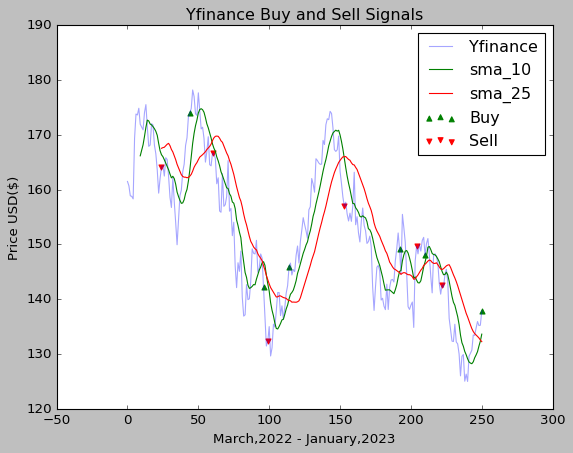

In [31]:

plt.plot(data_close['Yfinance'], label='Yfinance', alpha = 0.35)
plt.plot(data_close["sma_10"], label='sma_10')
plt.plot(data_close['sma_25'],label='sma_25')
plt.scatter(data_close.index, data_close['Buy Price'], label ='Buy', marker='^',color='green')
plt.scatter(data_close.index, data_close['Sell Price'],label='Sell', marker='v', color='red')
plt.title('Yfinance Buy and Sell Signals')
plt.xlabel('March,2022 - January,2023')
plt.ylabel("Price USD($)")
plt.legend(loc='upper right')
plt.show()